## **ML Model using [California Housing Prices Dataset from kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices)**

### **1. DATASET DESCRIPTION**
This dataset presents trends based on the 1990 California census. The collection consists of residences discovered in the California district and related information. It was chosen for this study because it is user-friendly and useful for grasping the fundamentals of machine learning. This report demonstrates linear regression between the _median house value_ and each of the following independent variables:

1. _median income_
2. _population_
3. _number of households_

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

### **2. LOAD DATA**
(Hyperlink of source in top)

The dataset is placed inside a directory named data/. Then loaded data frin into pandas. 

In [9]:
# Load dataset
housing_data = pd.read_csv("https://raw.githubusercontent.com/johnpalber/CSCN8010-labs/main/data/housing.csv")

### **3. EXPLATORY DATA ANALYSIS (EDA)** 

#### **3.1 EXPLORE STATISTICS**

In [10]:
print(housing_data.describe())

          longitude      latitude  housing_median_age   total_rooms   
count  20640.000000  20640.000000        20640.000000  20640.000000  \
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income   
count    20433.000000  20640.000000  20640.000000   20640.000000  \
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

#### **3.2 DESCRIBE VARIABLES**
There are four variables used to plot this report, named median_income, median_house_value, population and households.
According to the dataset description mean values of the columns fall closer to the min value, which means most population in the California buy houses valued from minimum to average value and less population buy houses which are worth closer to maximum value.

The min value and max value for the columns are:
|    Column Name     |    Min value  |    Max value   |
| ------------------ | ------------- | -------------- |
| median_income      |    0.499900   |    15.000100   |
| median_house_value |     14999     |     500001     |
| population         |       3       |     35682      |
| households         |       1       |     6082       |

##### **3.3 SEABORN SCATTER PLOTS**

**3.3.1. Plot between `median_house_value` and `median_income`**


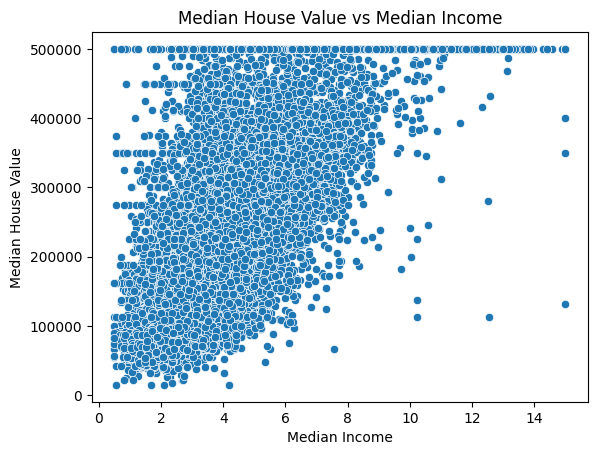

In [11]:
sns.scatterplot(x='median_income', y='median_house_value', data=housing_data)
plt.title('Median House Value vs Median Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

Plot 3.3.1 Insight :

The plot appears to reveal a pattern where as median income increases, there is a tendency for median house value to also increase. Higher median incomes tend to be associated with higher median house values.

**3.3.2 Plot between `median_house_value` and   `population`**

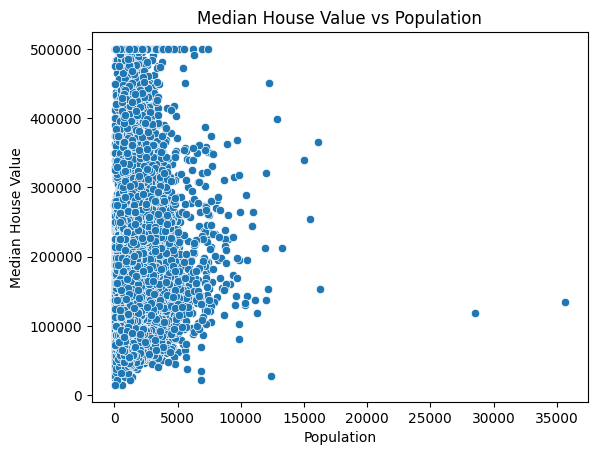

In [12]:
sns.scatterplot(x='population', y='median_house_value', data=housing_data)
plt.title('Median House Value vs Population')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.show()

Plot 3.3.2 Insight :

As the population increases, there is a discernible trend of decreasing median house value, signifying an inverse relationship between the two variables. This means that in this dataset, areas with higher populations tend to have lower median house values, and vice versa.

**3.3.3 Plot between `median_house_value` and `Number of households`**

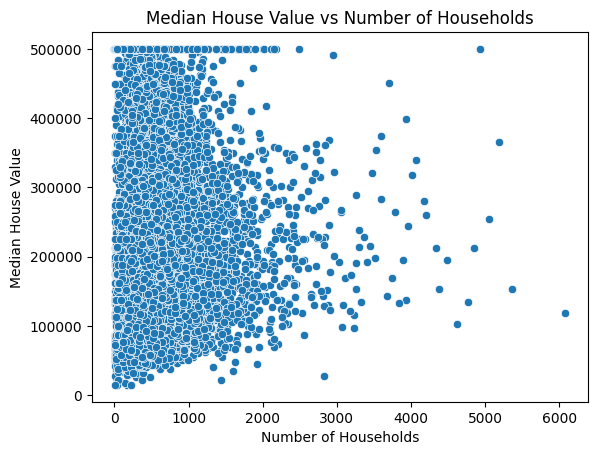

In [13]:
sns.scatterplot(x='households', y='median_house_value', data=housing_data)
plt.title('Median House Value vs Number of Households')
plt.xlabel('Number of Households')
plt.ylabel('Median House Value')
plt.show()

Plot 3.3.3 Insight:

There is a noticeable trend where as the number of households increases, the median house value tends to decrease.

### **4. LINEAR REGRESSION**

**4.1. Linear regression between  `median_house_value` vs. `median_income`**

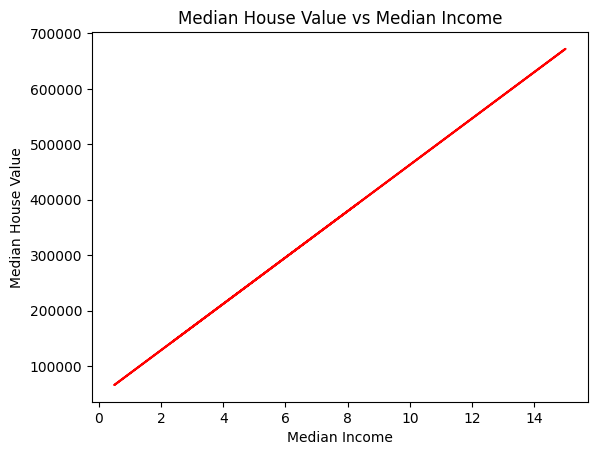

In [14]:
lin1 = LinearRegression().fit(housing_data[['median_income']], housing_data[['median_house_value']])
predict1 = lin1.predict(housing_data[['median_income']])
plt.plot(housing_data['median_income'], predict1, color='red')
plt.title('Median House Value vs Median Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

**4.2. Linear regression between `median_house_value` and `population`**

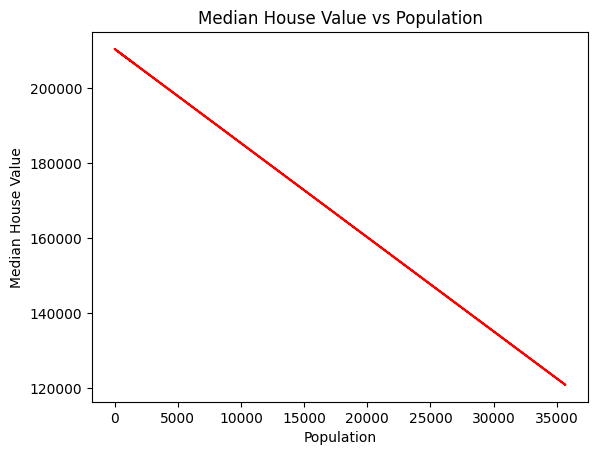

In [15]:
lin2 = LinearRegression().fit(housing_data[['population']], housing_data[['median_house_value']])
predict2 = lin2.predict(housing_data[['population']])
plt.plot(housing_data['population'], predict2, color='red')
plt.title('Median House Value vs Population')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.show()

**4.3. Linear regression between `median_house_values` and `number_of_households`**

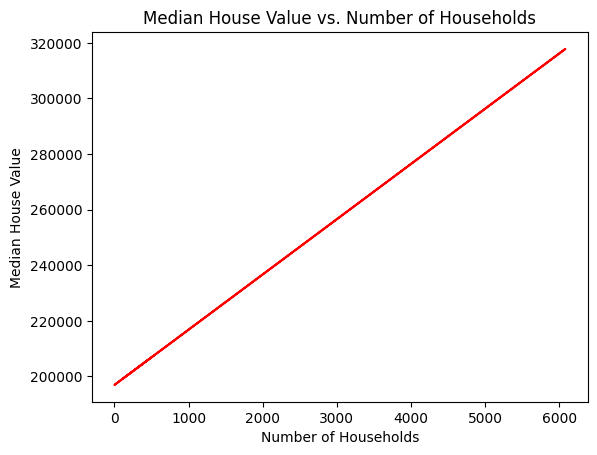

In [16]:
lin3 = LinearRegression().fit(housing_data[['households']], housing_data[['median_house_value']])
predict3 = lin3.predict(housing_data[['households']])
plt.plot(housing_data['households'], predict3, color='red')
plt.title('Median House Value vs. Number of Households')
plt.xlabel('Number of Households')
plt.ylabel('Median House Value')
plt.show()

### **5. SUMMARY TABLE OF PLOTS**

In [17]:
# Function to return model summary
def run_summary(X, y):
    # Fit the model
    lin = LinearRegression().fit(X, y)
    
    # Predict
    y_pred = lin.predict(X)
    
    # Calculate metrics
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    
    # Return model summary
    return {
        'intercept': lin.intercept_,
        'slope': lin.coef_[0],
        'MSE': mse,
        'MAE': mae,
    }

In [18]:
# Summary 1: Median Income vs. Median House Value
lin1_summary = run_summary(housing_data[['median_income']], housing_data['median_house_value'])

# Summary 2: Population vs. Median House Value
lin2_summary = run_summary(housing_data[['population']], housing_data['median_house_value'])

# Summary 3: Number of Households vs. Median House Value
lin3_summary = run_summary(housing_data[['households']], housing_data['median_house_value'])

In [19]:
# Summary table
summary_table = pd.DataFrame({
    'Model': ['Model 1', 'Model 2', 'Model 3'],
    'Intercept': [lin1_summary['intercept'], lin2_summary['intercept'], lin3_summary['intercept']],
    'Slope': [lin1_summary['slope'], lin2_summary['slope'], lin3_summary['slope']],
    'Mean Squared Error': [lin1_summary['MSE'], lin2_summary['MSE'], lin3_summary['MSE']],
    'Mean Absolute Error': [lin1_summary['MAE'], lin2_summary['MAE'], lin3_summary['MAE']]
})

print(summary_table)

     Model      Intercept         Slope  Mean Squared Error   
0  Model 1   45085.576703  41793.849202        7.011312e+09  \
1  Model 2  210436.262076     -2.511753        1.330741e+10   
2  Model 3  196928.577162     19.872775        1.325778e+10   

   Mean Absolute Error  
0         62625.933791  
1         91153.820095  
2         90802.743243  


### **6. RESULTING LINE ON TOP OF SCATTER DATA**

**6.1. Between  `median_house_value` vs. `median_income`**

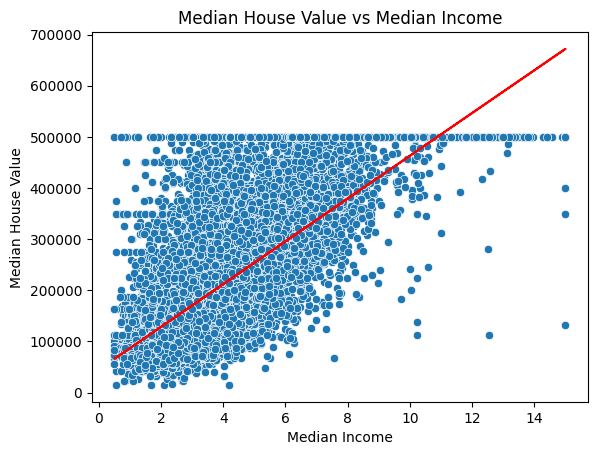

In [20]:
sns.scatterplot(x='median_income', y='median_house_value', data=housing_data)
plt.plot(housing_data['median_income'], predict1, color='red')
plt.title('Median House Value vs Median Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

**6.2. Between `median_house_value` and `population`**

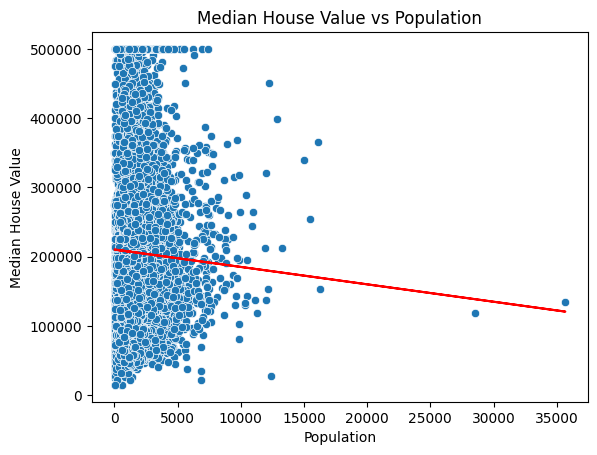

In [21]:
sns.scatterplot(x='population', y='median_house_value', data=housing_data)
plt.plot(housing_data['population'], predict2, color='red')
plt.title('Median House Value vs Population')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.show()

**6.3. Between `median_house_values` and `number_of_households`**

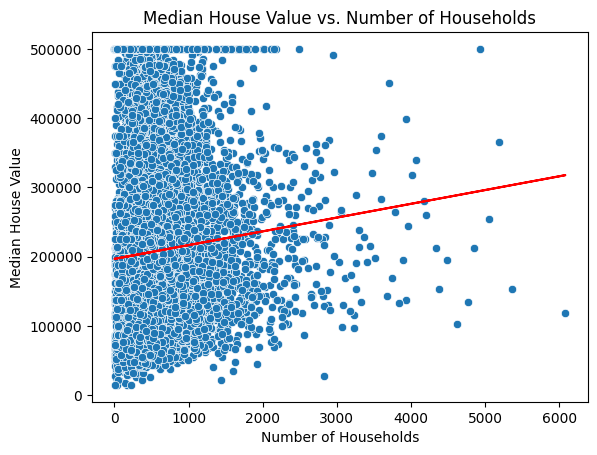

In [22]:
sns.scatterplot(x='households', y='median_house_value', data=housing_data)
plt.plot(housing_data['households'], predict3, color='red')
plt.title('Median House Value vs. Number of Households')
plt.xlabel('Number of Households')
plt.ylabel('Median House Value')
plt.show()

### **7. CONCLUSION AND INSIGHT**

goodness-of-fit : Based on the trends observed, there appears to be a fairly good fit between the demographic factors (number_of_households, population, and median_income) and median_house_value. The positive linear relationships depicted in each graph indicate a reasonable level of association and suggest that these demographic factors are important contributors to variations in median_house_value.


Insights : The positive correlations observed between median house value and the demographic factors (number_of_households, population, and median_income) imply that these factors play a significant role in determining the value of houses in a given area.
The data suggests that areas with larger populations, more households, and higher median incomes tend to have higher median house values.
The data indicates strong associations between these demographic factors and median house value, providing valuable insights into the factors impacting house values in different areas.